# Лабораторная работа №5
# Рекурсия. Фракталы.

## Выполнил студент группы БСТ2003 Круглов Илья
***

### Задание:
Реализовать генерацию заданного типа фрактала с применением рекурсивных функций.


Добавить возможность задания глубины фрактала. 


Оценить глубину рекурсии. 


Построить таблицу зависимости времени построения от глубины фрактала.

### Варианты заданий:

Вариант | Задание
:-------- |:-----
1, 7, 13, 19, 25 | Кривая Коха
2, 8, 14, 20, 26 | Кривая Гильберта
3, 9,15,21,27 | Кривая Серпинского
4, 10, 16, 22, 28 | Салфетка Серпинского
5, 11, 17, 23, 29| Ковер Серпинского
6, 12, 18, 24, 30 | Дерево Пифагора 


### Выполнение:

#### Реализация окна просмотра и рисования фрактала

In [ ]:
from turtle import *
from math import sqrt
import subprocess


# Определение тёмной/светлой темы системы
def check_appearance():
    cmd = 'defaults read -g AppleInterfaceStyle'
    p = subprocess.Popen(cmd, stdout=subprocess.PIPE,
                         stderr=subprocess.PIPE, shell=True)
    return bool(p.communicate()[0])


# Реализация окна просмотра и рисования фрактала
class FractalViewer:

    # Инициализация
    def __init__(self, size=800):
        self.screen = Screen()
        self.screen.title("Кривая Серпинского")
        self.screen_size = size

        self.turtle = Turtle()
        self.turtle.hideturtle()
        self.turtle.speed(0)
        self.turtle.up()

        # Выбор темы
        turtle_color, screen_bgcolor = ("white", "black") if check_appearance() else ("black", "white")
        self.turtle.color(turtle_color)
        self.screen.bgcolor(screen_bgcolor)

    # Открытие окна
    def show(self):
        self.screen.setup(self.screen_size, self.screen_size, 50)

    # Закрытие окна после клика
    def hide(self):
        self.screen.exitonclick()

    # Вывод фрактала
    def display_sierpinski(self, depth, animation=False):
        if animation:
            self.screen.tracer(4 ** depth, 0)
        else:
            self.screen.tracer(0, None)

        # Предварительная настройка черепахи
        size = 2 ** (depth - 1)     # Условный размер фрактала

        self.turtle.clear()
        self.turtle.home()
        self.turtle.pensize(self.screen_size / (15 * size))

        padding = 30                # Размер отступов от краев экрана
        side = 5 * size + size - 1  # Длина стороны фрактала в недиагональных шагах

        move_distance = (self.screen_size - padding * 2) / side  # длина недиагонального шага черепахи

        # Смещение черепахи в верхний левый угол (с учётом отступов)
        offset = self.screen_size // 2 - padding
        self.turtle.goto(-offset + move_distance, offset)
        self.turtle.right(45)

        # Рисование
        self.turtle.down()
        self.draw_sierpinski(depth, move_distance)
        self.turtle.up()

        if not animation:
            self.screen.update()

    # Рисование фрактала
    def draw_sierpinski(self, depth, move_distance=1):

        # Рисование половинки фрактала
        def half_sierpinski(level):
            if level > 0:
                half_sierpinski(level - 1)
                self.turtle.left(45)
                self.turtle.forward(move_distance)
                self.turtle.left(45)
                half_sierpinski(level - 1)

                self.turtle.right(90)
                self.turtle.forward(move_distance * sqrt(2))
                self.turtle.right(90)

                half_sierpinski(level - 1)
                self.turtle.left(45)
                self.turtle.forward(move_distance)
                self.turtle.left(45)
                half_sierpinski(level - 1)

            else:
                self.turtle.forward(move_distance * sqrt(2))

        for _ in range(2):
            half_sierpinski(depth)

            self.turtle.right(90)
            self.turtle.forward(move_distance * sqrt(2))
            self.turtle.right(90)


#### Код задания

In [ ]:
from lab_5_files.FractalViewer import FractalViewer
from compare import time_of, wait


# Ввод глубины и рисование фрактала
depth = int(input("Введите желаемую глубину фрактала: "))
viewer = FractalViewer()
viewer.show()
viewer.display_sierpinski(depth)

# Вывод таблицы
print("\nТаблица зависимости\nглубина | время отрисовки")
times = [0] * depth
for i in range(depth):
    time = round(time_of(viewer.draw_sierpinski, i, 1), 2)
    times[i] = time
    print(f"      {i+1} : {time:.2f}")
    wait()

# Подсчет шага геометрической прогрессии
summa = 0
for i in range(1, depth):
    step = times[i] / times[i-1]
    summa += step
print(f"Шаг геометрической прогрессии: ~{summa / (depth - 1):.1f}")

viewer.hide()


#### Использованное содержимое файла compare.py для подсчета времени выполнения функции

In [ ]:
import time


def wait(sec=1):
    time.sleep(sec)

def time_of(function, func_arg, precision):
    summa = 0
    for i in range(precision):
        start = time.perf_counter()
        function(func_arg)
        end = time.perf_counter()
        summa += abs(end - start)

    return summa / precision * 1000


### Вывод

1. Глубина рекурсии равна глубине фрактала. 
2. При увеличении глубины фрактала, время отрисовки увеличивается в геометрической прогресси. В идеальных условиях в 4 раза за каждый шаг. Чем больше задана глубина фрактала, тем ближе итоговое значение шага прогрессии к идеальному.

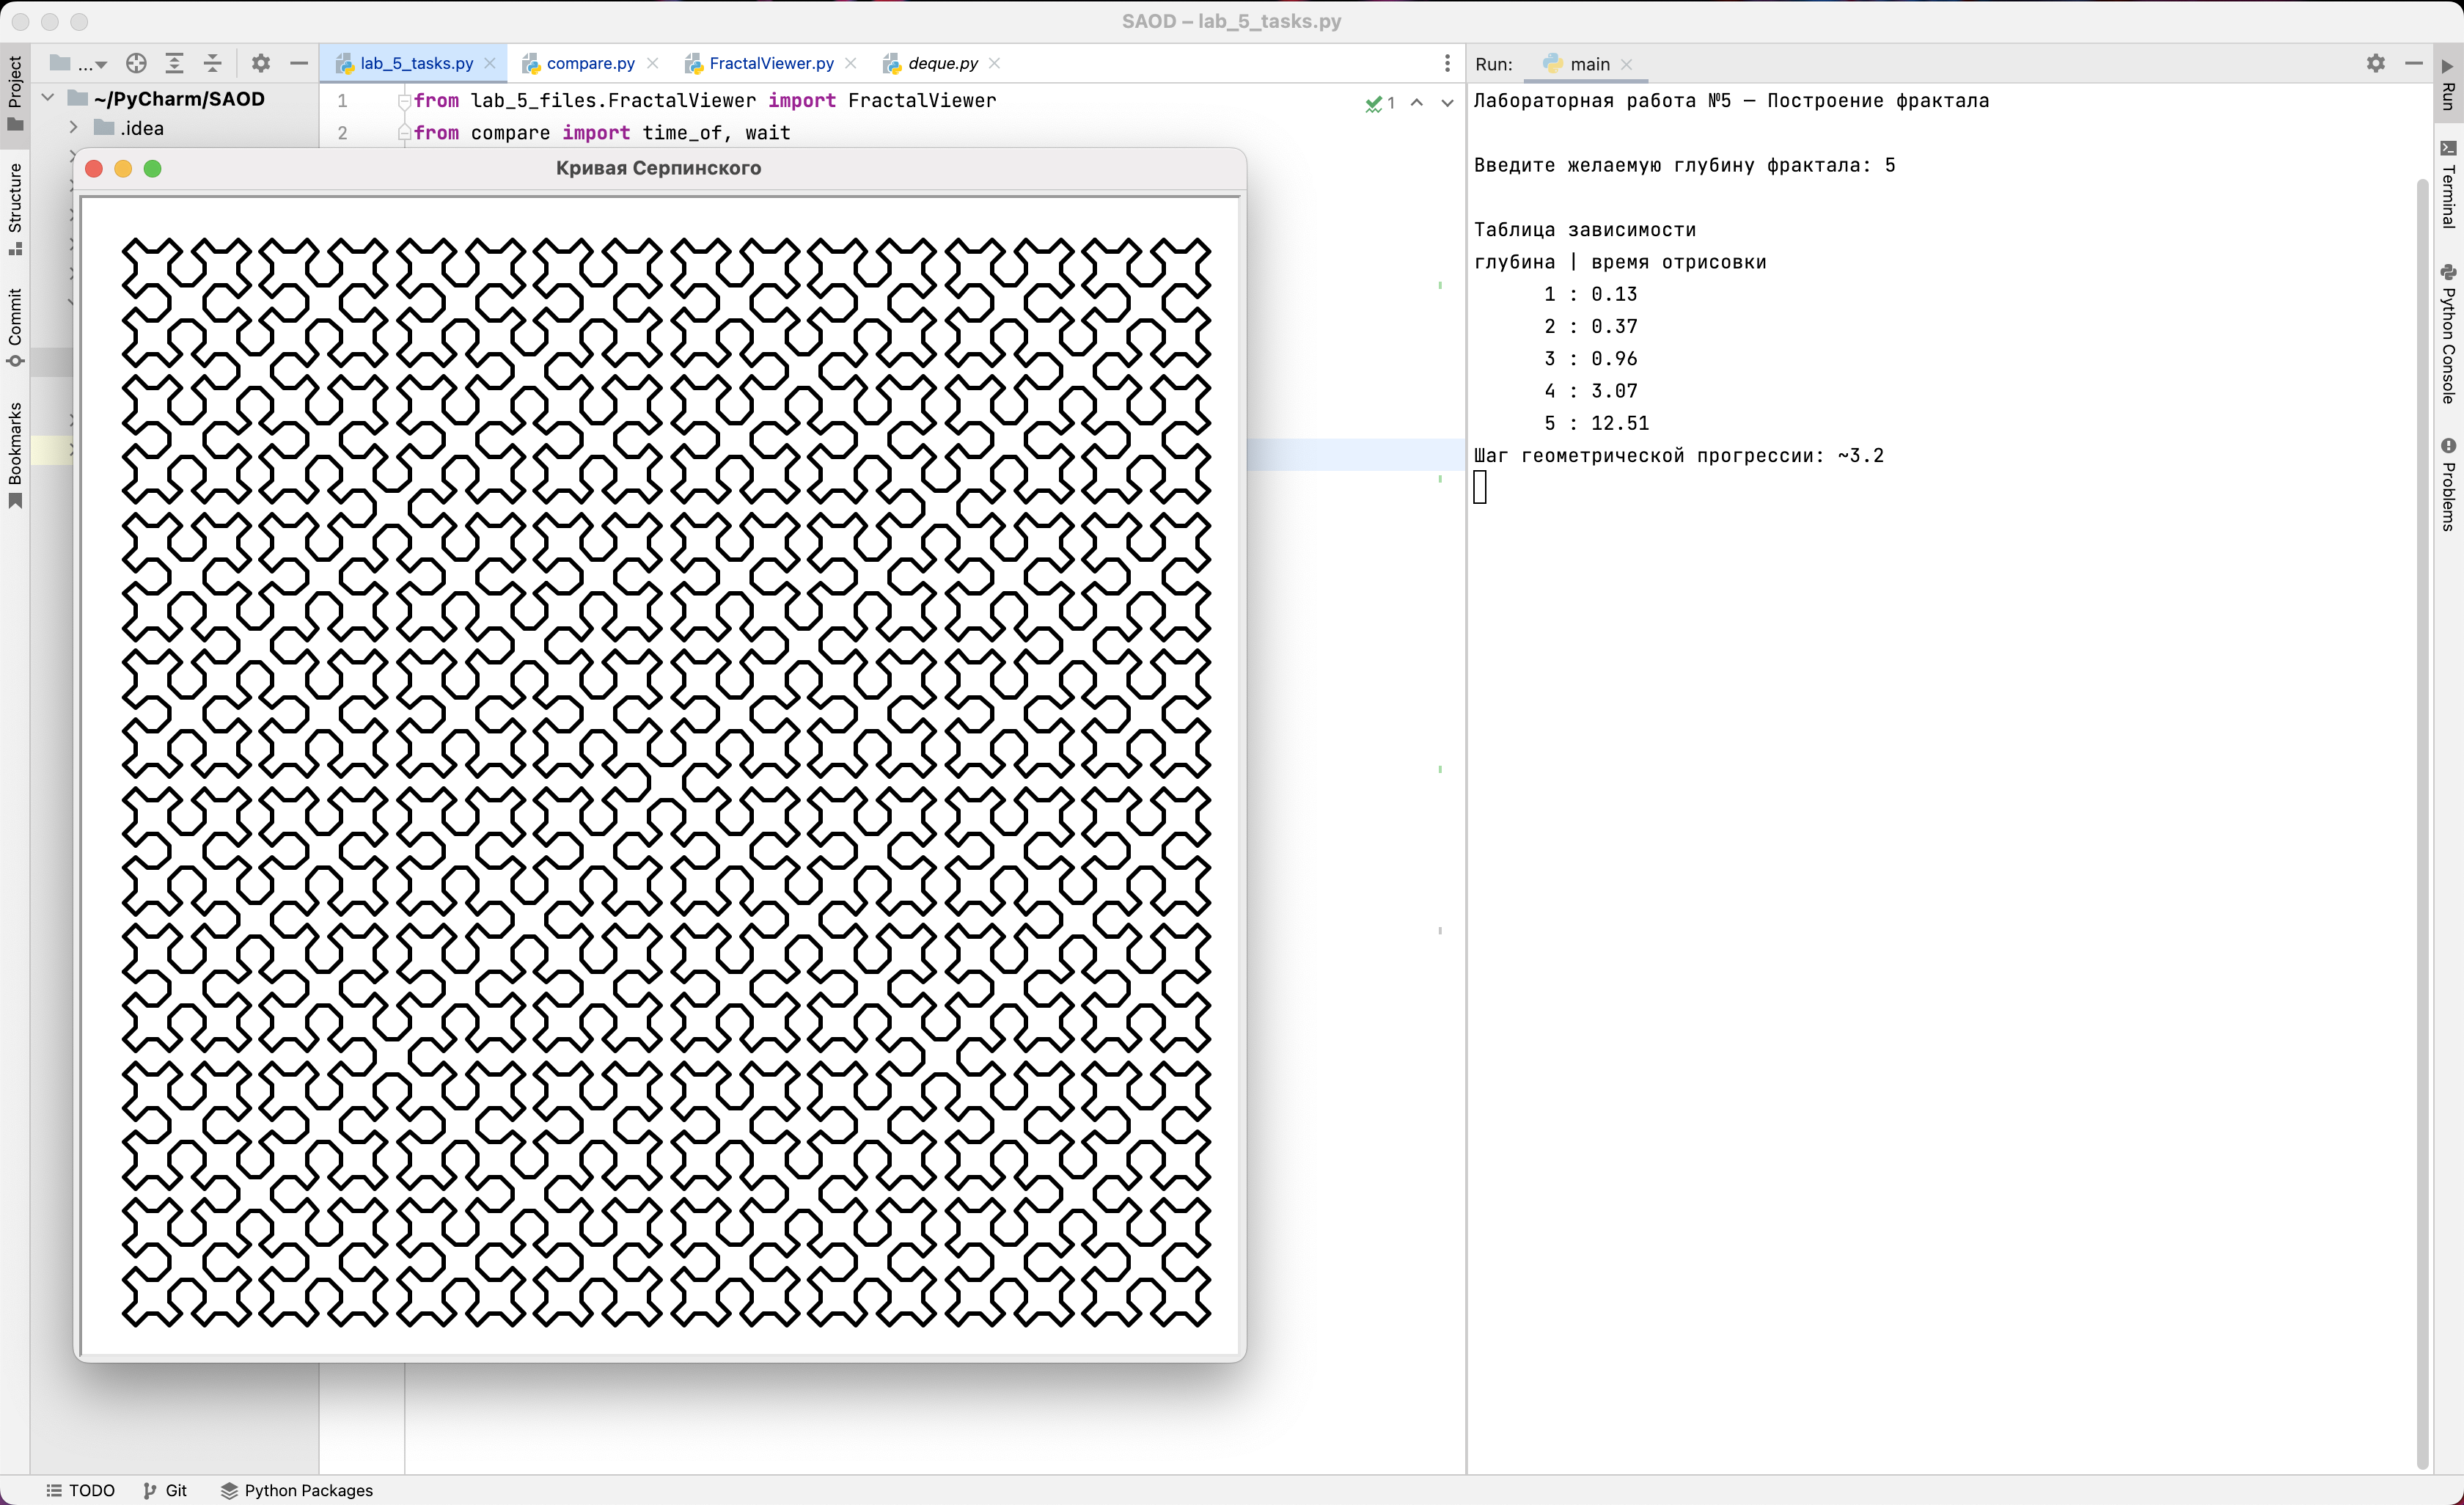